# Autoencoders on Handwritten Digit's Data


* Importing the Libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from keras.datasets import mnist
from keras.layers import Input, Dense
from keras.models import Model

* Importing the Dataset

In [ ]:
(x_train,_),(x_test,_)=mnist.load_data()

In [ ]:
x_train[0][5]

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
        18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
         0,   0], dtype=uint8)

In [ ]:
x_train.shape

(60000, 28, 28)

In [ ]:
x_test.shape

(10000, 28, 28)

* Scaling

In [ ]:
x_train=x_train/255.0
x_test=x_test/255.0

In [ ]:
x_train[0][5]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.01176471, 0.07058824, 0.07058824,
       0.07058824, 0.49411765, 0.53333333, 0.68627451, 0.10196078,
       0.65098039, 1.        , 0.96862745, 0.49803922, 0.        ,
       0.        , 0.        , 0.        ])

* Reshaping the Matrix

In [ ]:
x_train=x_train.reshape(len(x_train),28*28)
x_test=x_test.reshape(len(x_test),28*28)

In [ ]:
x_train.shape

(60000, 784)

* Data Visualization

Text(0.5, 0.98, 'Train Data')

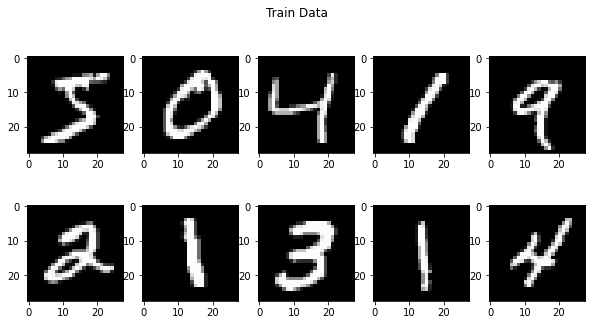

In [ ]:
plt.figure(figsize=(10,5))
for i in range(10):
    ax=plt.subplot(2,5,i+1)
    plt.imshow(x_train[i].reshape(28,28))
    plt.gray()
    # ax.get_xaxis().set_visible(False)
    # ax.get_yaxis().set_visible(False)
plt.suptitle("Train Data")

* Converting the Visualization into the function

In [92]:
def show_visuals(data,title,n=10,height=28,width=28):
    plt.figure(figsize=(10,5))
    for i in range(n):
        ax=plt.subplot(1,10,i+1)
        plt.imshow(data[i].reshape(height,width))
        plt.gray()
        # ax.get_xaxis().set_visible(False)
        # ax.get_yaxis().set_visible(False)
    plt.suptitle(title)

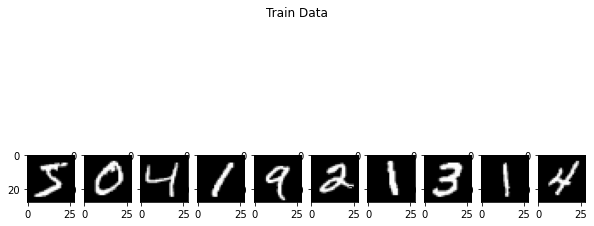

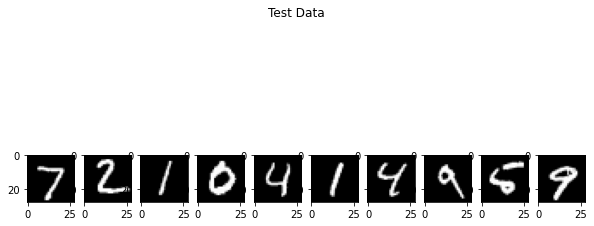

In [93]:
show_visuals(x_train,"Train Data")
show_visuals(x_test,"Test Data")

* Fixing the Dimentions

In [ ]:
input_dim, output_dim = 784, 784
encode_dim = 100
hidden_dim = 256

* Encoder

In [ ]:
input_layer=Input(shape=input_dim,name="Input")
hidden_layer_1=Dense(hidden_dim,activation='relu', name="HIDDEN_1")(input_layer)

* Bottle Neck

In [ ]:
bottle_neck=Dense(encode_dim,activation='relu', name="BOTTLE_NECK")(hidden_layer_1)

* Decoder

In [ ]:
hidden_layer_2 = Dense(hidden_dim, activation='relu', name='HIDDEN_2')(bottle_neck)
output_layer = Dense(output_dim, activation='sigmoid', name='OUTPUT')(hidden_layer_2)

* Model Selection

In [ ]:
model=Model(input_layer,output_layer)

* Compiling the Model

In [ ]:
model.compile(optimizer='adam',loss='binary_crossentropy')

* Model Summary

In [ ]:
model.summary()

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Input (InputLayer)          [(None, 784)]             0         
                                                                 
 HIDDEN_1 (Dense)            (None, 256)               200960    
                                                                 
 BOTTLE_NECK (Dense)         (None, 100)               25700     
                                                                 
 HIDDEN_2 (Dense)            (None, 256)               25856     
                                                                 
 OUTPUT (Dense)              (None, 784)               201488    
                                                                 
Total params: 454,004
Trainable params: 454,004
Non-trainable params: 0
_________________________________________________________________


* Training the Model

As this is the unsupervised learning, we give both the parameters as x_train

In [81]:
model.fit(x_train,x_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 17s 9ms/step - loss: 0.1113
Epoch 2/10
1875/1875 [==============================] - 17s 9ms/step - loss: 0.0805
Epoch 3/10
1875/1875 [==============================] - 14s 8ms/step - loss: 0.0760
Epoch 4/10
1875/1875 [==============================] - 16s 9ms/step - loss: 0.0738
Epoch 5/10
1875/1875 [==============================] - 19s 10ms/step - loss: 0.0724
Epoch 6/10
1875/1875 [==============================] - 18s 9ms/step - loss: 0.0715
Epoch 7/10
1875/1875 [==============================] - 17s 9ms/step - loss: 0.0708
Epoch 8/10
1875/1875 [==============================] - 16s 8ms/step - loss: 0.0703
Epoch 9/10
1875/1875 [==============================] - 14s 8ms/step - loss: 0.0699
Epoch 10/10
1875/1875 [==============================] - 16s 8ms/step - loss: 0.0696


* Decoding Data

In [82]:
decoded_data=model.predict(x_test)

313/313 [==============================] - 1s 3ms/step


* Getting the encoded data

In [83]:
get_encoded_data = Model(inputs=model.input,
                         outputs = model.get_layer('BOTTLE_NECK').output)

* Predicting the Encoded Data

In [84]:
encoded_data = get_encoded_data.predict(x_test)

313/313 [==============================] - 1s 4ms/step


* Visualizing the total Data

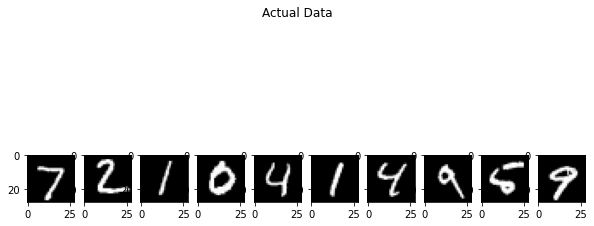

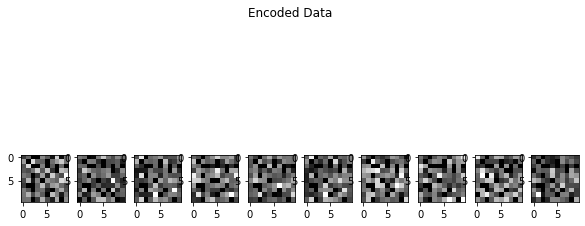

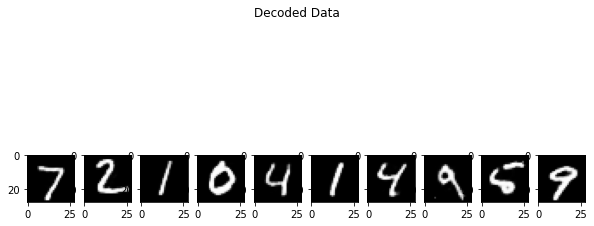

In [94]:
show_visuals(x_test, title="Actual Data")
show_visuals(encoded_data, title="Encoded Data", height=10, width=10)
show_visuals(decoded_data, title="Decoded Data")